In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [2]:
def rotation2D(theta, x):
    """ x: 2D array"""
    import math
    R = np.array([[math.cos(theta), -math.sin(theta)], [math.sin(theta), math.cos(theta)]])
    return R @ x

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

Text(0.5, 1.0, 'XOR data')

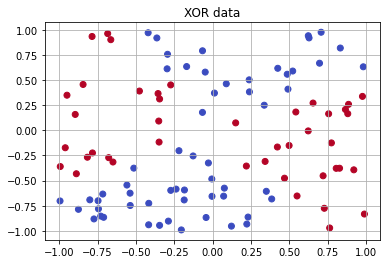

In [3]:
# XOR data
num_data = 100
num_test = 100
XOR_X = 2*np.random.rand(num_data, 2)-1
XOR_rot_y = np.array([np.sign(x[0])*np.sign(x[1]) for x in rotation2D(np.pi/3, XOR_X.T).T])
XOR_Xtest = 2*np.random.rand(num_test, 2)-1
XOR_rot_ytest = np.array([np.sign(x[0])*np.sign(x[1]) for x in rotation2D(np.pi/3, XOR_Xtest.T).T])
plt.scatter(XOR_X[:,0], XOR_X[:,1], c=XOR_rot_y, cmap=plt.cm.coolwarm)
plt.grid()
plt.title('XOR data')

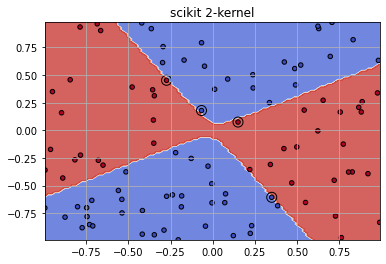

In [4]:
#X=XOR_X-np.mean(XOR_X, axis=0)
#X=np.array([x/np.linalg.norm(x)for x in XOR_X])
X=XOR_X
y=XOR_rot_y
Xtest = XOR_Xtest
ytest = XOR_rot_ytest
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1e5  # SVM regularization parameter
model = svm.SVC(kernel='poly', degree=2, gamma=1, C=C)
fit_model = model.fit(X, y)

# title for the plots
title = 'scikit 2-kernel'
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
X0test, X1test = Xtest[:, 0], Xtest[:, 1]
xx, yy = make_meshgrid(X0, X1)


ax = plt.axes()
plot_contours(ax, fit_model, xx, yy,
                cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.scatter(fit_model.support_vectors_[:, 0], fit_model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
ax.set_xlim(X0.min(), X0.max())
ax.set_ylim(X1.min(), X1.max())
ax.set_title(title)
plt.grid()
plt.show()

In [9]:
fit_model.classes_

array([-1.,  1.])